In [4]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [5]:
DATA_PATH='../../'
COV='MP789'
BLAST_OUT=DATA_PATH+COV+'/Blastn/dataframes/'

In [6]:

lung09_1_run0='lung09_10000_95pct_hits_df.csv'

lung09_1_run1='lung09_1_run1_10000_95pct_hits_df.csv'
lung09_1_run2='lung09_1_run2_10000_95pct_hits_df.csv'
lung09_2_run1='lung09_2_run1_10000_95pct_hits_df.csv'
lung09_2_run2='lung09_2_run2_10000_95pct_hits_df.csv'

In [7]:
df1=pd.read_csv(BLAST_OUT+lung09_1_run0)

In [8]:
df2=pd.read_csv(BLAST_OUT+lung09_1_run1)
df3=pd.read_csv(BLAST_OUT+lung09_1_run2)
df4=pd.read_csv(BLAST_OUT+lung09_2_run1)
df5=pd.read_csv(BLAST_OUT+lung09_2_run2)

In [9]:
df1.head()

,idx,title,text_title
0,4819430,gi|1197977613|ref|NG_054875.1| Homo sapiens...,"Homo sapiens RNA, 18S ribosomal pseudogene 5 ..."
1,14049532,gi|1848982279|ref|XR_004669553.1| PREDICT...,PREDICTED: Pan paniscus 18S ribosomal RN...
2,4524010,gi|74179056|dbj|AK171941.1| Mus musculus ac...,"Mus musculus activated spleen cDNA, RIKEN ful..."
3,11795594,gi|298889833|emb|FQ227006.1| Rattus norveg...,"Rattus norvegicus TL0AEA15YK06 mRNA sequence ,"
4,8116481,gi|1848982279|ref|XR_004669553.1| PREDICTE...,PREDICTED: Pan paniscus 18S ribosomal RN...


In [10]:
frames = [df1, df2, df3, df4]
df = pd.concat(frames)

In [11]:
df.head()

,idx,title,text_title,accession,hit_id,length,query_length
0,4819430,gi|1197977613|ref|NG_054875.1| Homo sapiens...,"Homo sapiens RNA, 18S ribosomal pseudogene 5 ...",NaN,NaN,NaN,NaN
1,14049532,gi|1848982279|ref|XR_004669553.1| PREDICT...,PREDICTED: Pan paniscus 18S ribosomal RN...,NaN,NaN,NaN,NaN
2,4524010,gi|74179056|dbj|AK171941.1| Mus musculus ac...,"Mus musculus activated spleen cDNA, RIKEN ful...",NaN,NaN,NaN,NaN
3,11795594,gi|298889833|emb|FQ227006.1| Rattus norveg...,"Rattus norvegicus TL0AEA15YK06 mRNA sequence ,",NaN,NaN,NaN,NaN
4,8116481,gi|1848982279|ref|XR_004669553.1| PREDICTE...,PREDICTED: Pan paniscus 18S ribosomal RN...,NaN,NaN,NaN,NaN


In [12]:
df.drop(columns=['accession','hit_id','length','query_length'],inplace=True)

In [13]:
frames = [df1, df]
df = pd.concat(frames)

In [14]:
len(df)

6945

In [15]:
df

,idx,title,text_title
0,4819430,gi|1197977613|ref|NG_054875.1| Homo sapiens...,"Homo sapiens RNA, 18S ribosomal pseudogene 5 ..."
1,14049532,gi|1848982279|ref|XR_004669553.1| PREDICT...,PREDICTED: Pan paniscus 18S ribosomal RN...
2,4524010,gi|74179056|dbj|AK171941.1| Mus musculus ac...,"Mus musculus activated spleen cDNA, RIKEN ful..."
3,11795594,gi|298889833|emb|FQ227006.1| Rattus norveg...,"Rattus norvegicus TL0AEA15YK06 mRNA sequence ,"
4,8116481,gi|1848982279|ref|XR_004669553.1| PREDICTE...,PREDICTED: Pan paniscus 18S ribosomal RN...
...,...,...,...
424,3381836,gi|1851828554|gb|MN629932.1| Hirundo smithii ...,Hirundo smithii voucher B-39509 external trans...
425,13893179,gi|1848982279|ref|XR_004669553.1| PREDICTED: ...,PREDICTED: Pan paniscus 18S ribosomal RNA (LOC...
426,7361124,gi|1848982279|ref|XR_004669553.1| PREDICTED: ...,PREDICTED: Pan paniscus 18S ribosomal RNA (LOC...
427,6870068,gi|1848982279|ref|XR_004669553.1| PREDICTED: ...,PREDICTED: Pan paniscus 18S ribosomal RNA (LOC...


In [19]:
df.text_title = df.text_title.str.replace('    ', '')
df.text_title = df.text_title.str.strip()

In [20]:
titles=df.text_title.to_list()

In [21]:
titles.sort()

In [22]:
titles

['AC018683 Homo sapiens BAC clone RP11-423P14 from 4, complete sequence ,',
 'AC018683 Homo sapiens BAC clone RP11-423P14 from 4, complete sequence ,',
 'AF193164 Mus musculus clone VST27030G1 somatically acquired provirus flanking sequence ,',
 'AF193164 Mus musculus clone VST27030G1 somatically acquired provirus flanking sequence ,',
 'Acomys russatus genome assembly, chromosome: 7,',
 'Acropsopilio chilensis voucher MCZIZ127628 18S ribosomal RNA gene, partial sequence ,',
 'Acropsopilio chilensis voucher MCZIZ127628 18S ribosomal RNA gene, partial sequence ,',
 'Allopodocotyle sp. MNHN JNC2522 18S ribosomal RNA gene, partial sequence,',
 'Almeida pilosa 18S ribosomal RNA gene, partial sequence ,',
 'Almeida pilosa 18S ribosomal RNA gene, partial sequence ,',
 'Almeida pilosa 18S ribosomal RNA gene, partial sequence,',
 'Almeida pilosa 18S ribosomal RNA gene, partial sequence,',
 'Amphipsyche proluta small subunit ribosomal RNA gene, partial sequence,',
 'Apristurus profundorum 18S r

In [23]:
human = [x for x in titles if x.startswith('Human')]
homo_sapiens = [x for x in titles if x.startswith('Homo sapiens')]

In [24]:
print(f'Homo sapiens percantage: {((len(human)+len(homo_sapiens))/len(titles))*100}')

Homo sapiens percantage: 1.8862491000719943


In [25]:
seqs, counts = np.unique(titles, return_counts=True)

In [27]:
counts, seqs = zip(*sorted(zip(counts, seqs), reverse=True))

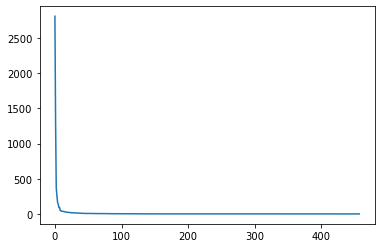

In [28]:
plt.plot(counts)

Most common ten frequencies

In [29]:
counts[:10]

(2808, 1305, 376, 256, 166, 136, 92, 92, 48, 48)

In [30]:
bats=['Rhinolophus','Hipposideros', 'Bat', 'Pipistrellus']

In [31]:
bat_r = [x for x in titles if 'rhinolophus' in x.lower()]
bat_b = [x for x in titles if 'bat coronavirus' in x.lower()]
bat_p = [x for x in titles if 'pipistrellus' in x.lower()]
bat_h = [x for x in titles if 'hipposideros' in x.lower()]

In [32]:
bat_tot=len(bat_r)+len(bat_b)+len(bat_p)+len(bat_h)

In [33]:
bat_tot

4

In [34]:
print(f'Bat percentage: {(bat_tot/len(titles))*100}')

Bat percentage: 0.057595392368610505


In [35]:
carp=[x for x in titles if 'carpio' in x]

In [36]:
print(f'Carp percantage: {(len(carp)/len(titles))*100}')

Carp percantage: 0.6911447084233261


Also carp here too, but nowhere near as prevalent as in RmYN02 

In [37]:
clonig_vectors=[x for x in titles if x.startswith('Cloning vector')]

In [38]:
clonig_vectors

[]

Blast hits to MP789 raw sequences, from most to least frequent

In [39]:
seqs

('PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA ,',
 'PREDICTED: Pan paniscus 18S ribosomal RNA (LOC117978904), rRNA,',
 'Danio rerio genome assembly, chromosome 7 ,',
 'Mus musculus in vitro fertilized eggs cDNA, RIKEN full-length enriched library, clone7420442G03 productWarning possibly chimeric clone, full insert sequence ,',
 'Danio rerio genome assembly, chromosome: 7,',
 'Mus musculus in vitro fertilized eggs cDNA, RIKEN full-length enriched library, clone:7420442G03 product:Warning: possibly chimeric clone, full insert sequence,',
 'Myxobolus sp. 4 BWX-2019 small subunit ribosomal RNA gene, partial sequence ,',
 'Linopodes sp. FP561 18S ribosomal RNA gene, partial sequence ,',
 'Tanypteryx sp. TS146 18S rRNA gene (partial), ITS1, 5.8S rRNA gene, ITS2 and 28S rRNA gene (partial), isolate TS146 ,',
 'PREDICTED: Manis pentadactyla 28S ribosomal RNA (LOC118908279), rRNA ,',
 'Linopodes sp. FP561 18S ribosomal RNA gene, partial sequence,',
 'Limecola balthica voucher

In [40]:
bonobo = [x for x in titles if 'Pan paniscus' in x]

In [41]:
print(f'Bonobo percentage: {(len(bonobo)/len(titles))*100}')

Bonobo percantage: 59.51043916486681


In [43]:
zebrafish = [x for x in titles if 'Danio rerio' in x]
print(f'Zebrafish percentage: {(len(zebrafish)/len(titles))*100}')

Zebrafish percantage: 8.264938804895609


In [44]:
mouse = [x for x in titles if 'Mus musculus' in x]
print(f'Mus musculus percentage: {(len(mouse)/len(titles))*100}')

Mus musculus percentage: 6.479481641468683


In [45]:
rat = [x for x in titles if 'Rattus' in x]
print(f'Rat percentage: {(len(rat)/len(titles))*100}')

Rat percentage: 1.5262778977681786
